# EDA

In [1]:
# Import Libraries
import configparser
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Connect to the MySQL database

config = configparser.ConfigParser()
config.read('../scripts/db_config.ini')

host = config['mysql']['host']
user = config['mysql']['user']
password = config['mysql']['password']

connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)

print("¡Connected to the database!")
cursor = connection.cursor()

¡Connected to the database!


In [3]:
# Select the "dbcandidates" database and do the SQL query to bring the data from the "candidates" table. Read the data in a dataframe

cursor.execute("USE dbcandidates")
query_table = "SELECT * FROM candidates"

df_db = pd.read_sql(query_table, connection)

df_db.head()


C:\Users\Maria Jose\AppData\Local\Temp\ipykernel_8908\2562221584.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_db = pd.read_sql(query_table, connection)


,candidate_id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [4]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   candidate_id               50000 non-null  int64 
 1   first_name                 50000 non-null  object
 2   last_name                  50000 non-null  object
 3   email                      50000 non-null  object
 4   application_date           50000 non-null  object
 5   country                    50000 non-null  object
 6   yoe                        50000 non-null  int64 
 7   seniority                  50000 non-null  object
 8   technology                 50000 non-null  object
 9   code_challenge_score       50000 non-null  int64 
 10  technical_interview_score  50000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 4.2+ MB


In [5]:
null_columns = df_db.isnull().sum()
print(null_columns)


candidate_id                 0
first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64


In [6]:
unique_values = df_db.nunique()
print("Unique values per column:")
print(unique_values)

Unique values per column:
candidate_id                 50000
first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64


In [7]:
# descriptive statistics

columns_statistics = ["code_challenge_score", "technical_interview_score", "yoe"]

description = df_db[columns_statistics].describe()
print(description)


       code_challenge_score  technical_interview_score           yoe
count          50000.000000               50000.000000  50000.000000
mean               4.996400                   5.003880     15.286980
std                3.166896                   3.165082      8.830652
min                0.000000                   0.000000      0.000000
25%                2.000000                   2.000000      8.000000
50%                5.000000                   5.000000     15.000000
75%                8.000000                   8.000000     23.000000
max               10.000000                  10.000000     30.000000


In [8]:
# Create the hiring column

df_db["hired"] = np.where((df_db["code_challenge_score"] >= 7) & (df_db["technical_interview_score"] >= 7), "yes", "no")

print(df_db.head())


   candidate_id  first_name   last_name                      email  \
0             1  Bernadette   Langworth        leonard91@yahoo.com   
1             2      Camryn    Reynolds        zelda56@hotmail.com   
2             3       Larue      Spinka   okey_schultz41@gmail.com   
3             4        Arch      Spinka     elvera_kulas@yahoo.com   
4             5       Larue  Altenwerth  minnie.gislason@gmail.com   

  application_date  country  yoe  seniority  \
0       2021-02-26   Norway    2     Intern   
1       2021-09-09   Panama   10     Intern   
2       2020-04-14  Belarus    4  Mid-Level   
3       2020-10-01  Eritrea   25    Trainee   
4       2020-05-20  Myanmar   13  Mid-Level   

                          technology  code_challenge_score  \
0                      Data Engineer                     3   
1                      Data Engineer                     2   
2                     Client Success                    10   
3                          QA Manual            

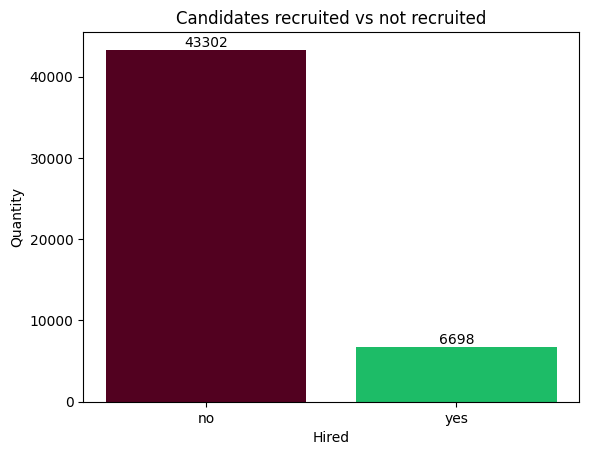

In [9]:
# Graphic of candidates hired

hires_count = df_db['hired'].value_counts()

plt.bar(hires_count.index, hires_count.values, color=['#520120', '#1DBC67'])
for i, valor in enumerate(hires_count.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Candidates recruited vs not recruited')
plt.xlabel('Hired')
plt.ylabel('Quantity')
plt.show()


In [10]:
# Unique values by technology

unique_technology = df_db["technology"].unique()
print(unique_technology)

['Data Engineer' 'Client Success' 'QA Manual'
 'Social Media Community Management' 'Adobe Experience Manager' 'Sales'
 'Mulesoft' 'DevOps' 'Development - CMS Backend' 'Salesforce'
 'System Administration' 'Security' 'Game Development'
 'Development - CMS Frontend' 'Security Compliance'
 'Development - Backend' 'Design'
 'Business Analytics / Project Management' 'Development - Frontend'
 'Development - FullStack' 'Business Intelligence'
 'Database Administration' 'QA Automation' 'Technical Writing']


In [11]:
# Create a column to group technologies into categories

category_technology = {
    'Data Engineer': 'Project and Data Management',
    'Client Success': 'Customer and Sales Management',
    'QA Manual': 'QA Testing',
    'Social Media Community Management': 'Community Management and Design',
    'Adobe Experience Manager': 'Management of Platforms and Tools',
    'Sales': 'Customer and Sales Management',
    'Mulesoft': 'Management of Platforms and Tools',
    'DevOps': 'Operations and System Administration',
    'Development - CMS Backend': 'Software Development',
    'Salesforce': 'Customer and Sales Management',
    'System Administration': 'Operations and System Administration',
    'Security': 'Security',
    'Game Development': 'Software Development',
    'Development - CMS Frontend': 'Software Development',
    'Security Compliance': 'Security',
    'Development - Backend': 'Software Development',
    'Design': 'Community Management and Design',
    'Business Analytics / Project Management': 'Project and Data Management',
    'Development - Frontend': 'Software Development',
    'Development - FullStack': 'Software Development',
    'Business Intelligence': 'Project and Data Management',
    'Database Administration': 'Project and Data Management',
    'QA Automation': 'QA Testing',
    'Technical Writing': 'Project and Data Management'
}

df_db['category_technology'] = df_db['technology'].apply(lambda x: category_technology.get(x, 'Other'))

print(df_db["category_technology"].unique())


['Project and Data Management' 'Customer and Sales Management'
 'QA Testing' 'Community Management and Design'
 'Management of Platforms and Tools'
 'Operations and System Administration' 'Software Development' 'Security']


In [12]:
# Unique values by seniority

print(df_db["seniority"].unique())

['Intern' 'Mid-Level' 'Trainee' 'Junior' 'Lead' 'Architect' 'Senior']


In [13]:
# Unique values by country

print(df_db["country"].unique())

['Norway' 'Panama' 'Belarus' 'Eritrea' 'Myanmar' 'Zimbabwe'
 'Wallis and Futuna' 'Italy' 'Timor-Leste' 'Armenia'
 'French Southern Territories' 'Chad' 'El Salvador' 'Mozambique'
 'Brunei Darussalam' 'Morocco' 'Saint Helena' 'Portugal'
 'Central African Republic' 'Seychelles' 'Dominica' 'Finland' 'Belgium'
 'Niue' 'Japan' 'Palestinian Territory' 'Faroe Islands' 'Latvia'
 'Saudi Arabia' 'Poland' 'Micronesia' 'Macao' 'Bangladesh' 'Taiwan'
 'Slovakia (Slovak Republic)' 'Mexico' 'Nigeria' 'Guadeloupe'
 'Bosnia and Herzegovina' 'Guyana' 'Croatia'
 'Svalbard & Jan Mayen Islands' 'Yemen' 'Ukraine' 'Zambia' 'Paraguay'
 'Puerto Rico' 'Madagascar' 'Bulgaria' 'Jersey' 'French Polynesia'
 'United States of America' 'Mali' 'Anguilla'
 'Holy See (Vatican City State)' 'Andorra' 'Republic of Korea' 'Turkey'
 'Heard Island and McDonald Islands' 'Malta' 'Liechtenstein'
 'Equatorial Guinea' 'Algeria' 'Falkland Islands (Malvinas)' 'Ecuador'
 'Jamaica' 'San Marino' 'Malawi' 'Albania' 'Guinea-Bissau' 'Brazil

In [14]:
print(df_db.head())

   candidate_id  first_name   last_name                      email  \
0             1  Bernadette   Langworth        leonard91@yahoo.com   
1             2      Camryn    Reynolds        zelda56@hotmail.com   
2             3       Larue      Spinka   okey_schultz41@gmail.com   
3             4        Arch      Spinka     elvera_kulas@yahoo.com   
4             5       Larue  Altenwerth  minnie.gislason@gmail.com   

  application_date  country  yoe  seniority  \
0       2021-02-26   Norway    2     Intern   
1       2021-09-09   Panama   10     Intern   
2       2020-04-14  Belarus    4  Mid-Level   
3       2020-10-01  Eritrea   25    Trainee   
4       2020-05-20  Myanmar   13  Mid-Level   

                          technology  code_challenge_score  \
0                      Data Engineer                     3   
1                      Data Engineer                     2   
2                     Client Success                    10   
3                          QA Manual            

In [15]:
# Create a new table to keep the candidates hired and technology categories

new_table_query = """
    CREATE TABLE IF NOT EXISTS candidates_hired (
        candidate_id INT AUTO_INCREMENT PRIMARY KEY,
        first_name VARCHAR(100),
        last_name VARCHAR(100),
        email VARCHAR(200),
        application_date DATE,
        country VARCHAR(100),
        yoe INT,
        seniority VARCHAR(100),
        technology VARCHAR(200),
        code_challenge_score INT,
        technical_interview_score INT,
        hired ENUM('yes', 'no'),
        category_technology VARCHAR(200)
    )
"""

cursor.execute(new_table_query)


column = df_db.columns 

query2_insert = "INSERT INTO candidates_hired ({}) VALUES ({})".format(
    ', '.join(column),
    ', '.join(['%s'] * len(column))
)

values_row = [tuple(row) for row in df_db.values]
cursor.executemany(query2_insert, values_row)

connection.commit()
cursor.close()
connection.close()
